# Load Handwritten Digits Dataset from Sci-kitLearn

In [5]:
from sklearn.datasets import load_digits
digits=load_digits()

In [6]:
digits.images.shape

(1797, 8, 8)

In [7]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

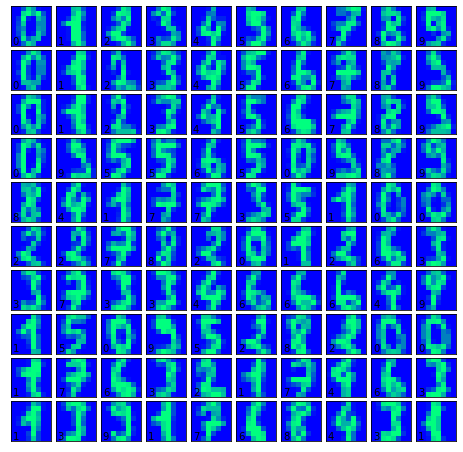

In [8]:
import matplotlib.pyplot as plt

fig,axes=plt.subplots(10,10,figsize=(8,8),
                     subplot_kw={'xticks':[],'yticks':[]},
                     gridspec_kw=dict(hspace=0.1,wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i],cmap='winter',interpolation='nearest')
    ax.text(0.05,0.05,int(digits.target[i]),transform=ax.transAxes,color='black')

In [9]:
x=digits.data
x.shape

(1797, 64)

In [10]:
y=digits.target
y.shape

(1797,)

# Unsupervised learning: Dimensionality reduction

In [11]:
from sklearn.manifold import Isomap
iso=Isomap(n_components=2)
iso.fit(digits.data)
data_projected=iso.transform(digits.data)
data_projected.shape

(1797, 2)

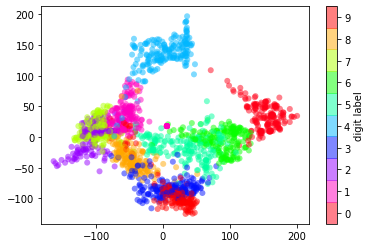

In [12]:
plt.scatter(data_projected[:,0],data_projected[:,1],c=digits.target,
           edgecolor='none',alpha=0.5,cmap=plt.cm.get_cmap('hsv_r',10))
plt.colorbar(label='digit label',ticks=range(10))
plt.clim(-0.5,9.5);

In [13]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=0)

In [14]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(xtrain,ytrain)
y_model=model.predict(xtest)

In [15]:
model.fit(xtrain, ytrain)

GaussianNB(priors=None, var_smoothing=1e-09)

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,y_model)

0.8333333333333334

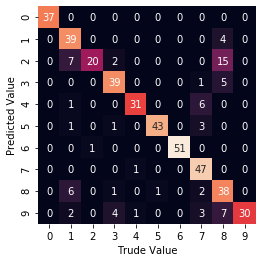

In [17]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

mat=confusion_matrix(ytest,y_model)

sns.heatmap(mat,square=True,annot=True,cbar=False)
plt.xlabel('Trude Value')
plt.ylabel('Predicted Value');

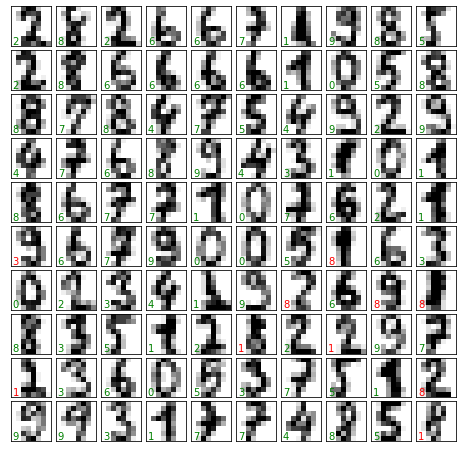

In [18]:
fig, axes =plt.subplots(10,10,figsize=(8,8),
                        subplot_kw={'xticks':[],'yticks':[]},
                        gridspec_kw=dict(hspace=0.1,wspace=0.1))
test_images=xtest.reshape(-1,8,8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i],cmap='binary',interpolation='nearest')
    ax.text(0.05,0.05,str(y_model[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i]==y_model[i]) else 'red')